In [44]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [45]:
dataFrame = pd.read_csv("uber.csv")

In [46]:
dataFrame.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [47]:
dataFrame.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [48]:
dataFrame = dataFrame.dropna()

In [49]:
dataFrame.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit
10,1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting


<Figure size 1200x800 with 0 Axes>

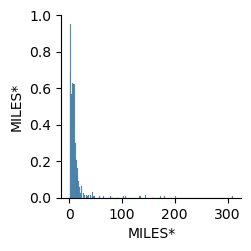

In [50]:
plt.figure(figsize=(12,8))
sbn.pairplot(dataFrame)

In [51]:
dataFrame.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


<Axes: xlabel='CATEGORY*', ylabel='count'>

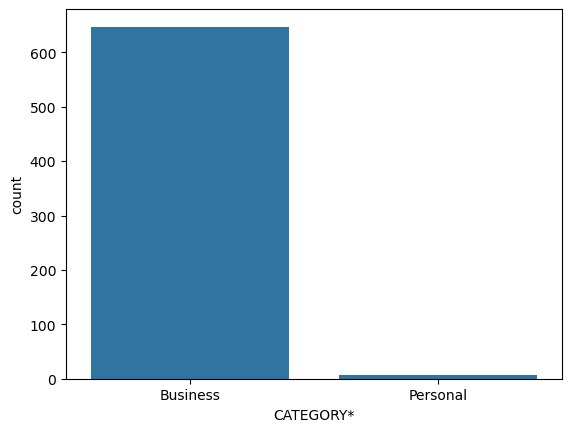

In [52]:
sbn.countplot(x="CATEGORY*", data = dataFrame)

<Axes: xlabel='PURPOSE*', ylabel='count'>

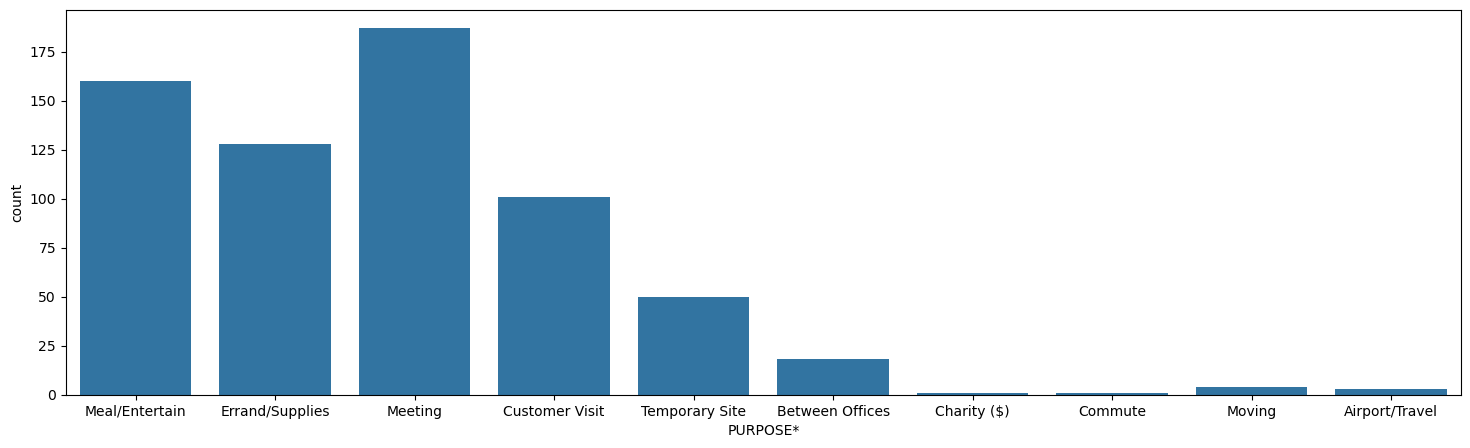

In [53]:
plt.figure(figsize=(18, 5))
sbn.countplot(x="PURPOSE*", data = dataFrame)

In [54]:
# Yıl bazında toplam kat edilen mesafe
dataFrame['START_DATE*'] = pd.to_datetime(dataFrame['START_DATE*'])
dataFrame['year'] = dataFrame['START_DATE*'].dt.year

total_miles_by_year = dataFrame.groupby('year')['MILES*'].sum()
print(total_miles_by_year)

year
2016    7311.2
Name: MILES*, dtype: float64


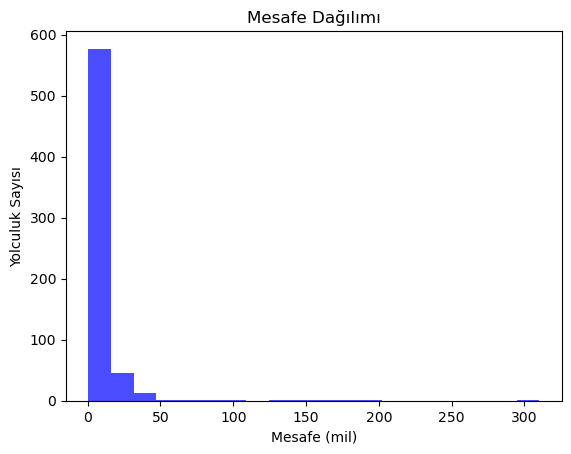

In [55]:
# Mesafe dağılımı histogramı
plt.hist(dataFrame['MILES*'], bins=20, color='blue', alpha=0.7)
plt.title('Mesafe Dağılımı')
plt.xlabel('Mesafe (mil)')
plt.ylabel('Yolculuk Sayısı')
plt.show()

In [56]:
# En sık kullanılan rotaları bulma
popular_routes = dataFrame.groupby(['START*', 'STOP*']).size().sort_values(ascending=False).head(10)
print(popular_routes)


START*            STOP*           
Cary              Morrisville         52
Morrisville       Cary                51
Cary              Cary                44
Unknown Location  Unknown Location    30
Cary              Durham              30
Durham            Cary                29
Kar?chi           Kar?chi             20
Cary              Raleigh             17
Lahore            Lahore              16
Raleigh           Cary                15
dtype: int64


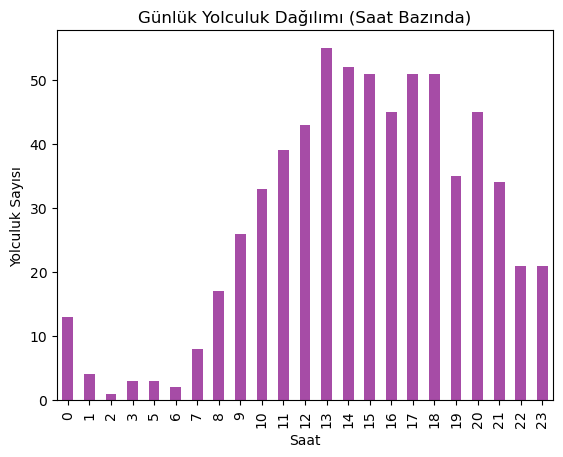

In [57]:
# Saat bazında yolculuk sayısı
dataFrame['hour'] = dataFrame['START_DATE*'].dt.hour

hourly_trips = dataFrame.groupby('hour').size()
hourly_trips.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Günlük Yolculuk Dağılımı (Saat Bazında)')
plt.xlabel('Saat')
plt.ylabel('Yolculuk Sayısı')
plt.show()

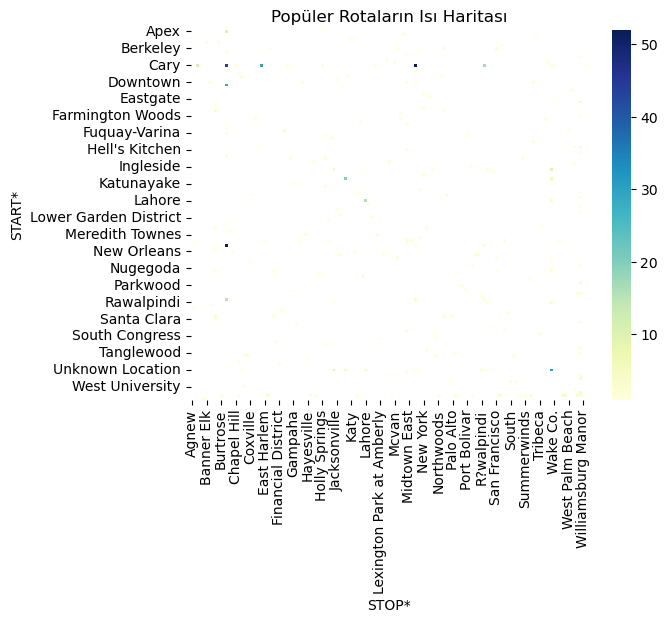

In [58]:
# Isı haritası ile popüler rotaları görselleştirme
route_pivot = dataFrame.pivot_table(index='START*', columns='STOP*', values='MILES*', aggfunc='count')
sbn.heatmap(route_pivot, cmap="YlGnBu")
plt.title('Popüler Rotaların Isı Haritası')
plt.show()


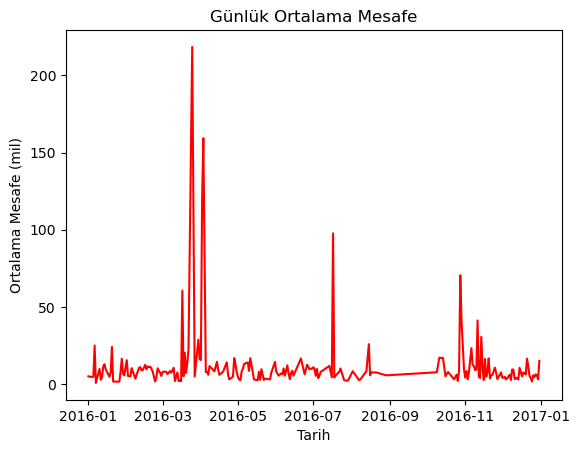

In [59]:
# Günlük ortalama mesafe
daily_avg_miles = dataFrame.groupby(dataFrame['START_DATE*'].dt.date)['MILES*'].mean()
daily_avg_miles.plot(kind='line', color='red')
plt.title('Günlük Ortalama Mesafe')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Mesafe (mil)')
plt.show()


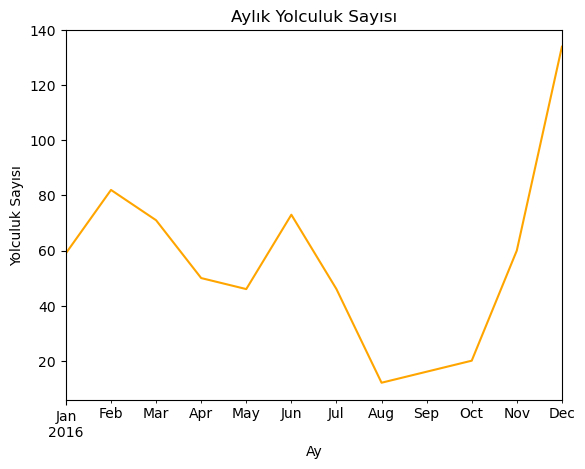

In [60]:
# Aylık yolculuk sayısı
dataFrame['month_year'] = dataFrame['START_DATE*'].dt.to_period('M')
monthly_trips = dataFrame.groupby('month_year').size()
monthly_trips.plot(kind='line', color='orange')
plt.title('Aylık Yolculuk Sayısı')
plt.xlabel('Ay')
plt.ylabel('Yolculuk Sayısı')
plt.show()


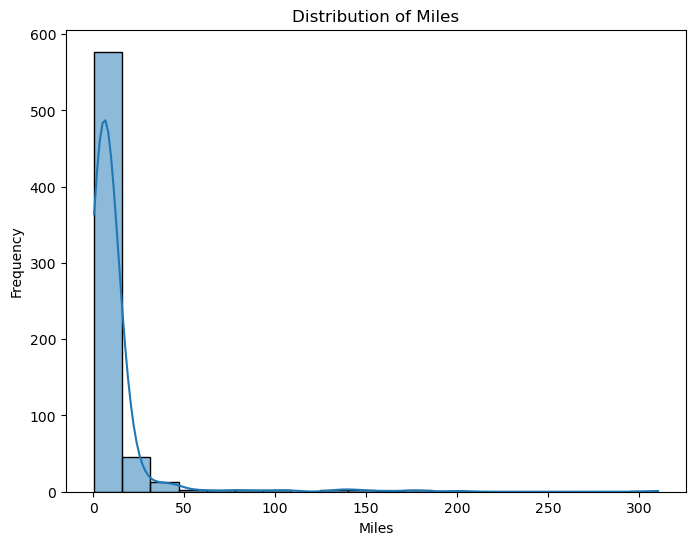

In [78]:
# MILES* sütununun histogramı
plt.figure(figsize=(8, 6))
sbn.histplot(dataFrame['MILES*'], bins=20, kde=True)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()


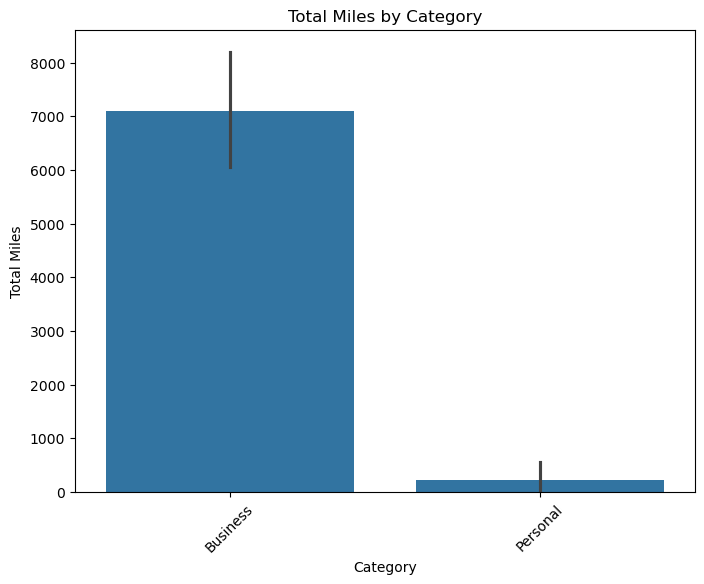

In [80]:
# CATEGORY* ve MILES* ilişkisini gösteren bar grafiği
plt.figure(figsize=(8, 6))
sbn.barplot(x='CATEGORY*', y='MILES*', data=dataFrame, estimator=sum)
plt.title('Total Miles by Category')
plt.xlabel('Category')
plt.ylabel('Total Miles')
plt.xticks(rotation=45)
plt.show()


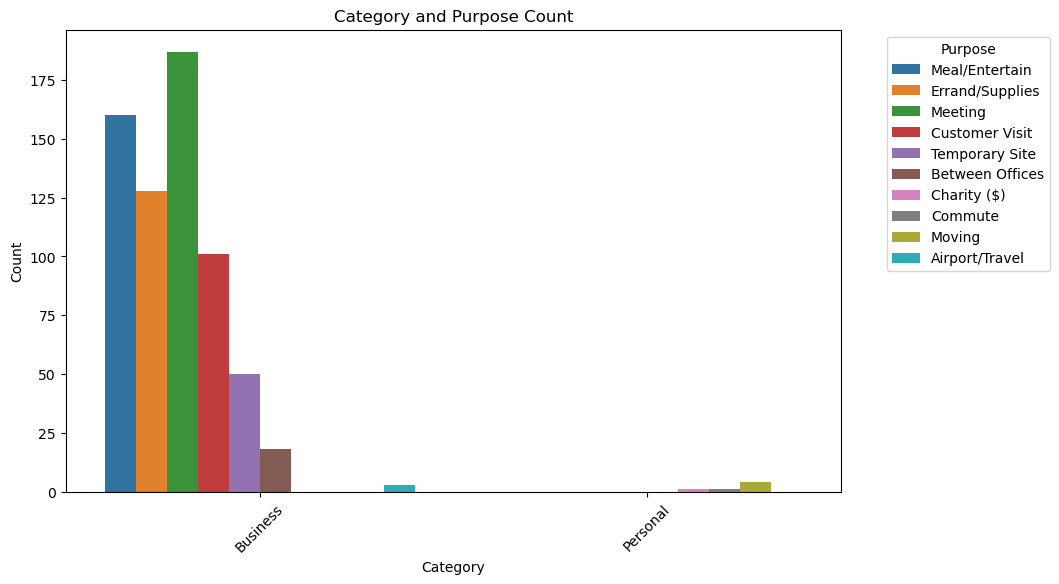

In [82]:
# CATEGORY* ve PURPOSE* kombinasyonunu gösteren countplot
plt.figure(figsize=(10, 6))
sbn.countplot(x='CATEGORY*', hue='PURPOSE*', data=dataFrame)
plt.title('Category and Purpose Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


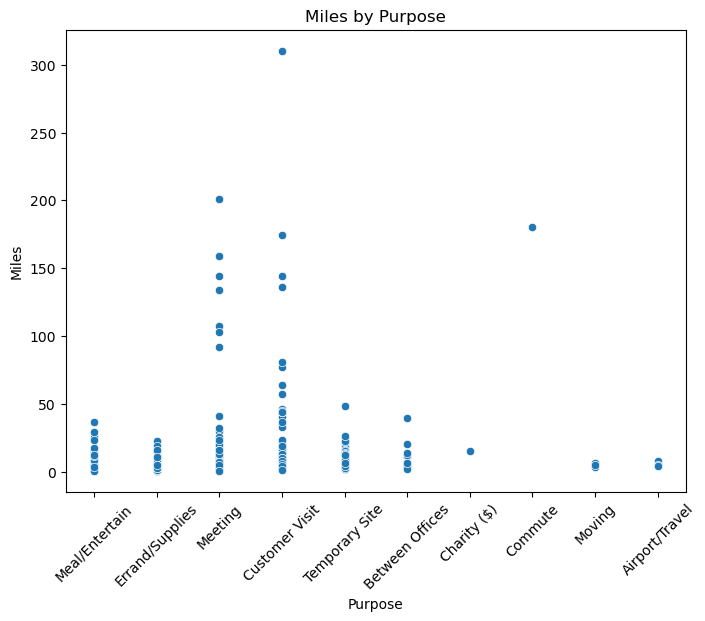

In [86]:
# MILES* ve PURPOSE* ilişkisini gösteren scatterplot
plt.figure(figsize=(8, 6))
sbn.scatterplot(x='PURPOSE*', y='MILES*', data=dataFrame)
plt.title('Miles by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Miles')
plt.xticks(rotation=45)
plt.show()
